# Pre-training
- 모델이 일반적인 패턴과 지식을 학습하도록 훈련하는 단계
- 대규모, 일반적인 데이터셋(예: 텍스트, 이미지 등) 사용
- 학습 과정
    - 모델이 다양한 종류의 데이터에서 일반적인 특징(feature)을 추출하도록 설계
    - 언어 모델의 경우, 자연어의 구조, 어휘, 문맥을 이해하도록 훈련
    - 이미지 모델의 경우, 패턴, 색상, 모양과 같은 일반적인 시각적 특징을 학습
- 학습 결과
    - 특정 작업에 한정되지 않고 다양한 도메인에서 활용 가능(범용)
    - 모델이 "초기화된 상태"보다 더 높은 수준의 성능을 발휘할 준비가 됨

# Transfer Learning
- 사전 학습된 모델의 지식을 새로운 작업에 적용하는 과정
- 학습 데이터가 부족하거나 새로운 작업을 빠르게 해결하기 위해 기존 모델에서 학습된 지식을 재사용



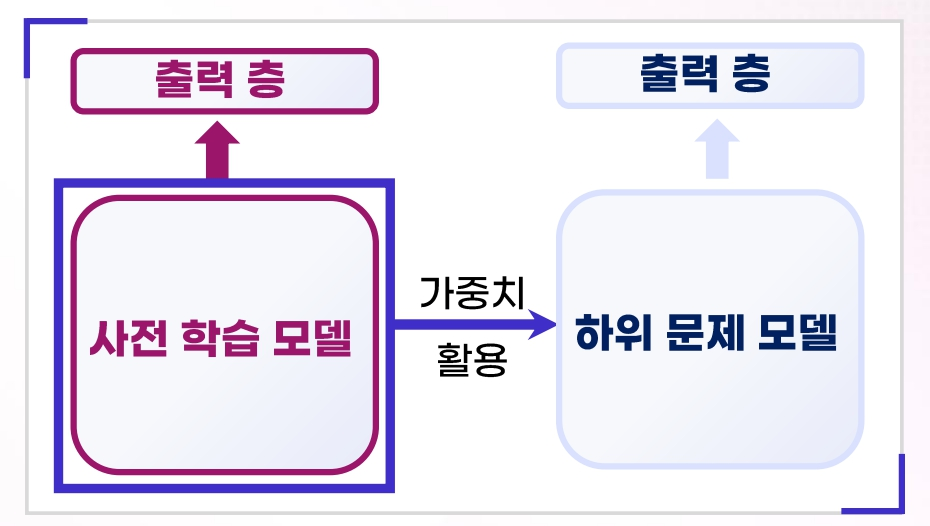

## 미세 조정(Fine-tuning)
- 사전 학습된 모델의 가중치를 조정하여 특정 작업에 최적화하는 과정
- 딥 러닝에서 미세조정은 사전 훈련된 모델의 가중치가 새로운 데이터에 대해 훈련되는 전이 학습에 대한 접근 방식
- 사전학습 된 모델에 추가로 개별과제에 맞는 새로운 레이어를 추가하여 이미 학습된 모델의 가중치 전체 또는 일부를 미세하게 조정하는 학습 방법
- 목적
> 기존 모델의 지식을 바탕으로, 특정 도메인이나 작업에서 최상의 성능을 달성
- 특징
    - 사전 학습된 모델의 일부 또는 전체 가중치를 업데이트
    - 특정 도메인/작업에 맞게 미세 조정 수행
    - Fine-tuning은 보통 소량의 추가 학습 데이터와 훈련 과정이 필요

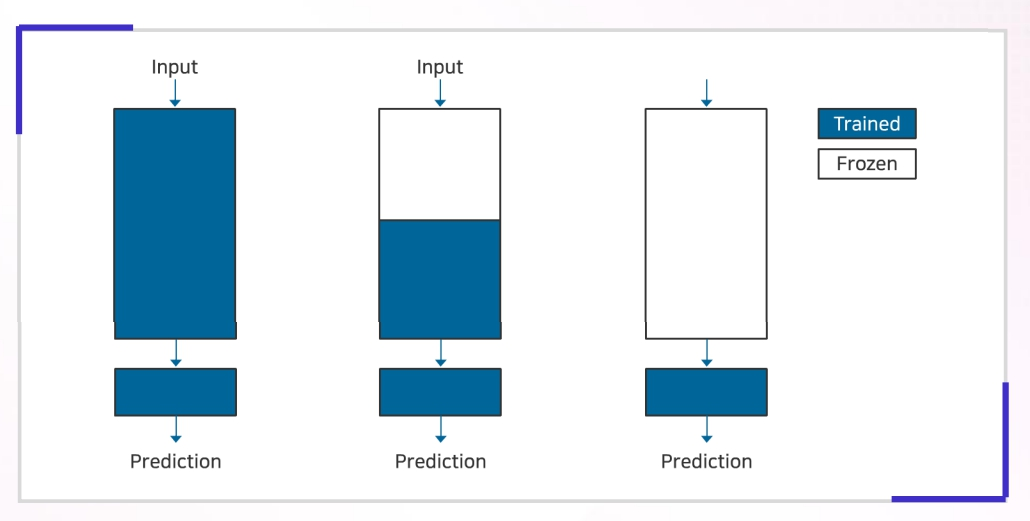

# BERT(Bidirectional Encoder Representations from Transformers)
- 2018년에 구글이 공개한 사전 훈련된 모델
- BERT는 등장과 동시에 수많은 NLP 테스크에서 최고 성능을 보여주면서 명실공히 NLP의 한 획을 그은 모델로 평가
- 트랜스포머에서 인코더만을 사용하고 활성화 함수로 GELU 를 사용
- 양방향으로 정보를 처리하는 트랜스포머 기반의 언어 모델
- 다양한 종류의 자연어 처리 과제에서 전이학습을 쉽게 할 수 있도록 설계
- BERT의 사전 학습
    - MLM(Masked Language Model)
    - NSP(Next Sentence Prediction)

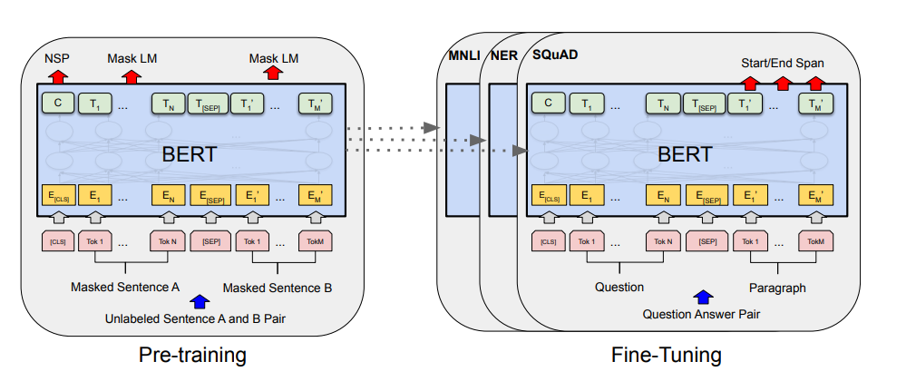

- Gaussian Error Linear Units
    - 정규분포의 누적분포함수로 0 주위를 부드럽게 변화해준다.

$$
\text{GELU}\left(x\right) = x * \Phi\left(x\right)
$$


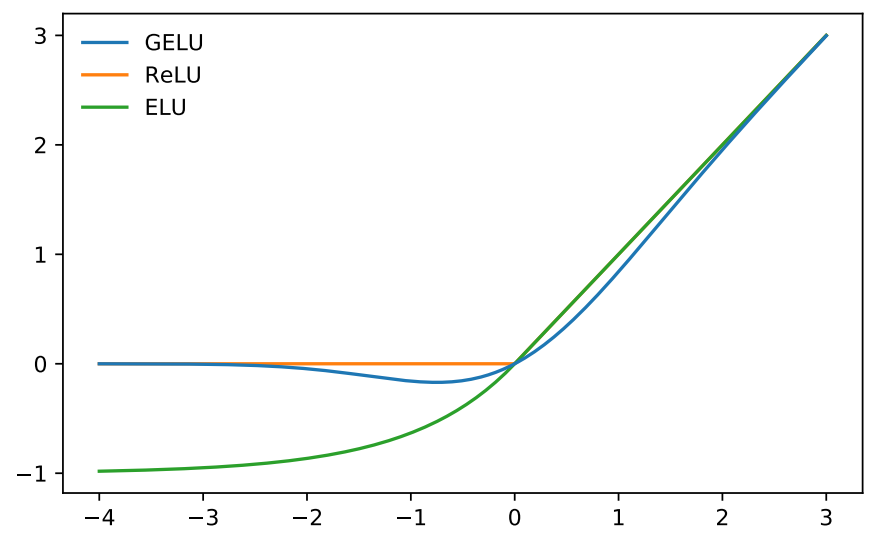

## BERT Architecture
- Multi-layer bidirectional Transformer encoder
    - L: number of layers
    - H: hidden size
    - A: number of self-attention heads
- BERT base
    - L=12, H=768, A=12
    - Total Parameters = 110M
- BERT large
    - L=24, H=1024, A=16
    - Total Parameters = 340M


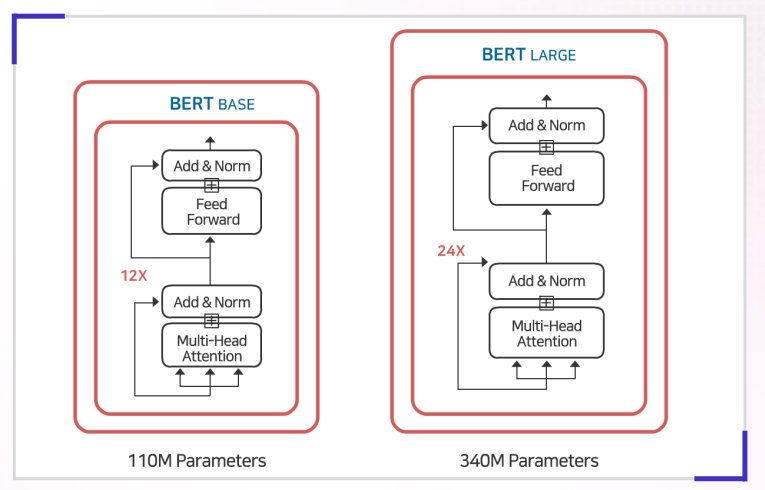

## BERT input representation
- Token embeddings
    - [CLS]: 분류 문제를 위한 특수 토큰
    - [SEP]: 문장 구분을 위한 특수 토큰
- Segmentation embeddings
    - 문장을 구분하기 위한 임베딩
- Position embeddings
    - 위치 정보를 위한 임베딩


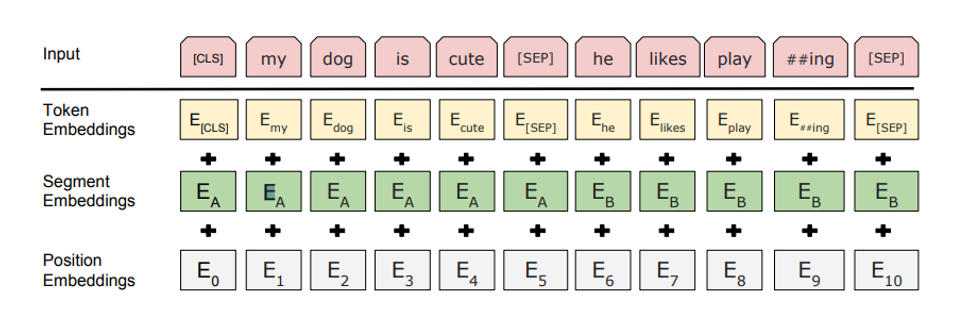

## WordPiece tokenization
- Google 에서 BERT를 사전 학습하기 위해 개발한 토큰화 알고리즘
- 단어를 더 작은 단위로 쪼개는 준 단어 토큰화
    - 글자 단위에서 준 단어로 병합해 나가는 방식으로 vocabulary를 만드는 토큰화
- BPE(Byte Pair Encoding)와 유사한 알고리즘



### BPE 알고리즘(Byte Pair Encoding)
- Vocabulary 생성 -> Vocabulary을 이용한 토큰화
- BPE 사전생성 순서​
    - 1단계. 주어진 모든 문장들을 토큰화​
    - 2단계. 토큰의 각 문자로 초기 Vocabulary 생성​
    - 3단계. 가장 많이 등장한 bi-gram 쌍을 병합 후 Vocabulary 업데이트
        - 정의한 Vocabulary 크기 만큼 반복​

- BPE 예시
    - 토큰화 실시 (토큰, 출현 빈도 수)
    ```
        [('car', 5), ('cable', 3), ('tablet', 1), ('watch', 2), ('chair', 5), ('mouse', 1)]
    ```
    - 토큰들의 문자로 기본 Vocabulary 생성​
    ```
        ['a', 'b', 'c', 'e', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't', 'u', 'w']
    ```
    - 기본 Vocabulary 기반으로 가장 많이 등장한 bi-gram 쌍을 기본 Vocabulary 에 추가​
    ```
        [ca 8, cr 5, ar 5, cb 3, ... ] # ca가 8번으로 제일 많음​
    ```
    - 기본 Vocabulary 업데이트​
    ```
        ['a', 'b', 'c', 'e', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't', 'u', 'w', 'ca']
    ```
    ※ 기본 Vocabulary 크기가 정의한 크기만큼 될 때 까지

- WordPiece 에서 병합할 쌍이 선택되는 방식
$$
\frac{bigram쌍빈도}{bigram개별1빈도 \times bigram개별2빈도}
$$

## Position Embedding
- 트랜스포머에서는 포지셔널 인코딩(Positional Encoding) 방법을 통해 단어의 위치 정보를 표현
- BERT는 위치 정보를 사인 함수와 코사인 함수로 만드는 것이 아닌 학습을 통해서 얻는 포지션 임베딩(Position Embedding) 방법을 사용


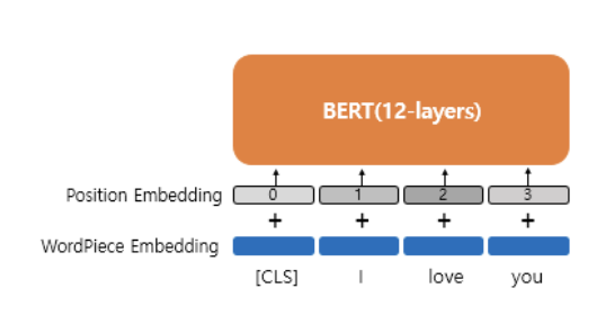

## Pre-training BERT
- Masked LM
    - 가려진 단어를 예측
- Next Sentence Prediction
    - 두 문장이 이어지는 문장인지의 여부를 예측


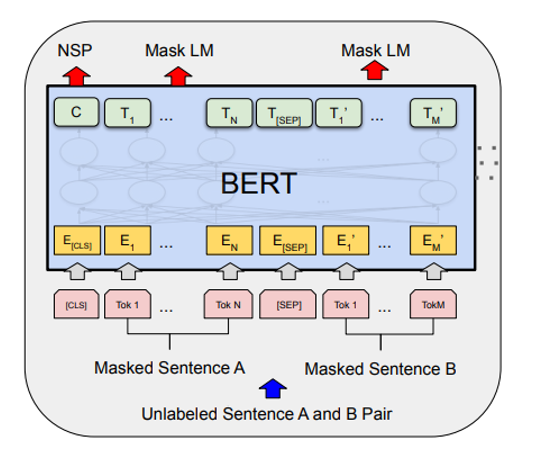

## MLM(Masked Language Model)
- 입력 문장에서 랜덤하게 일부 토큰을 [MASK]로 대체하고, 모델이 이를 예측하도록 학습
    - 가려진 토큰을 예측하도록 학습
    - 문맥적 표현(contextual representation)을 학습
    - 문장에서 주변 단어를 기반으로 누락된 단어를 추론하는 능력 향상
- 입력 토큰 중 15%를 무작위로 선택하여 마스킹(Masking)
- 무작위로 선택된 15% 토큰 중
    - 80%: [MASK] 토큰으로 대체하여 가림
    - 10%: 무작위로 다른 토큰으로 대체
    - 10%: 원래의 단어를 그대로 둠


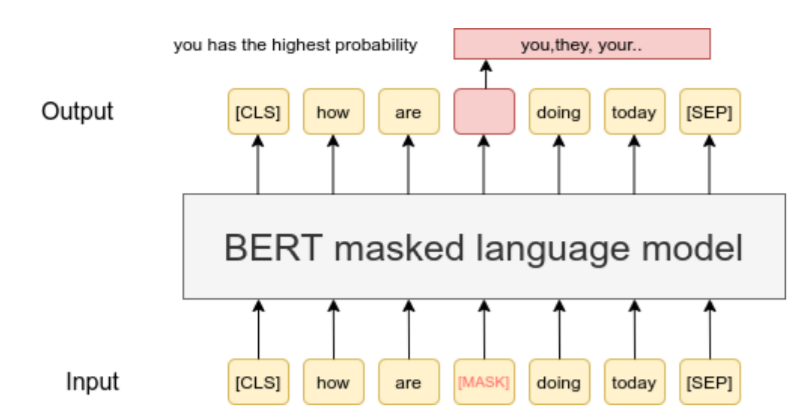

## NSP(Next Sentence Prediction)
- 두 개의 문장이 주어졌을 때, 두 번째 문장이 첫 번째 문장 뒤에 실제로 이어지는 문장인지 여부를 예측
    - 문장 간의 관계를 학습하여 문서 수준의 이해 능력 강화
- 50%는 실제로 이어지는 문장, 50%는 무작위로 이어 붙인 문장을 학습 데이터로 사용
- [CLS] 토큰의 출력 값을 통해 실제로 이어진 문장인지를 예측하도록 학습


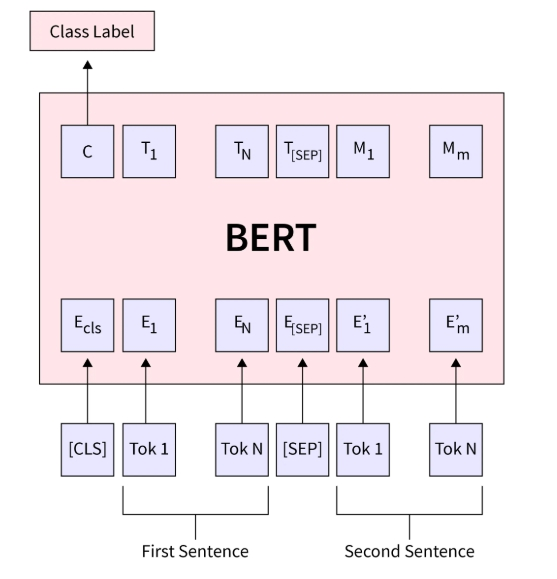

# Hugging Face란?
- https://huggingface.co/
- Hugging Face는 오픈소스 소프트웨어, API, 그리고 NLP와 딥러닝 커뮤니티를 제공하는 AI 연구 기업
- 트랜스포머나 데이터셋 같은 머신러닝 프레임워크를 제공하는 세계 최대의 인공지능 플랫폼
- 개발자는 여기에 공개된 머신러닝 레퍼런스를 통해 최신 모델을 스스로 구축할 수 있음
- 트랜스포머 모델을 만들 때 코드를 작성할 필요없이 여기서 트랜스포머 라이브러리를 가져오기만 하면 되기 때문에 유용
- 최신 모델을 업데이트할 뿐만 아니라, 지속적인 리뷰를 통해 완성도 높은 모델을 받을 수 있음
- 주요 제공 기능
    - Transformers 라이브러리: 대규모 언어 모델 사용을 위한 핵심 Python 라이브러리
    - Datasets 라이브러리: 다양한 오픈소스 데이터셋에 접근 가능한 라이브러리
    - Tokenizers: 고성능 토크나이저 생성 및 사용
    - Hugging Face Hub: 다양한 모델과 데이터셋을 공유할 수 있는 클라우드 플랫폼


# Transformers 라이브러리
- Transformers 라이브러리는 Hugging Face의 핵심 라이브러리로, 사전 학습된 언어 모델(pre-trained models)을 쉽게 사용할 수 있도록 설계
- NLP 뿐만 아니라 Vision, Audio 등의 모델도 지원
- 텍스트 분류, 질문 응답, 텍스트 생성, 번역, 감성 분석, 요약 등 다양한 작업 지원
- PyTorch와 TensorFlow를 모두 지원
- 사전 학습된 모델 로드 및 Fine-tuning이 직관적
- 설치하기
```bash
pip install transformers
```

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "../data/"
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
df = pd.read_csv(f"{DATA_PATH}imdb_small.csv")
df

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [4]:
df["sentiment"].mean()

0.516042780748663

# AutoTokenizer 클래스
- 사전학습 모델에 사용된 방식으로 토큰화

In [5]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## 토크나이저 객체의 주요 파라미터
- padding: 시퀀스 길이를 동일하게 맞추기 위해 사용
    - "max_length": max_length 파라미터에 지정한 길이로 패딩
    - True: 배치 내 가장 긴 시퀀스에 맞춰 패딩
    - False: 기본값(패딩 x)
- max_length: 텍스트를 토큰화할 때 사용할 최대 길이
    - 설정 x: 모델이 입력받을 수 있는 최대 길이
- truncation: 입력 텍스트를 최대 길이로 제한
    - True: max_length에 따라 제한
    - False: 제한 x(기본값)
- return_tensors: 반환되는 토큰화 데이터의 형식
    - "pt": pytorch의 텐서 형식으로 반환
        - 하나의 샘플을 전달해도 배치 차원 포함
    - "tf": 텐서플로우의 텐서 형식으로 반환
    - "np": ndarray 형식으로 반환
    - None: 기본값, 파이썬 리스트

In [6]:
lst = df.iloc[:2, 0].tolist()
lst

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  ',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  ']

In [7]:
tokenizer(lst[0], padding=True, return_tensors=None)

{'input_ids': [101, 1037, 2200, 1010, 2200, 1010, 2200, 4030, 1011, 3048, 1010, 6614, 3238, 3185, 2055, 1037, 24305, 1010, 15013, 2402, 2158, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

- 토크나이저 객체의 특수 토큰 번호

In [8]:
tokenizer.all_special_ids

[100, 102, 0, 101, 103]

- 토크나이저 객체의 특수 토큰 문자열

In [9]:
tokenizer.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

- 모델이 최대로 입력받을 수 있는 시퀀스 길이

In [10]:
tokenizer.model_max_length

512

In [11]:
train = tokenizer(df["review"].tolist(), padding="max_length", truncation=True, return_tensors="pt")
train.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [12]:
for k, v in train.items():
    print(k, v.shape)

input_ids torch.Size([748, 512])
token_type_ids torch.Size([748, 512])
attention_mask torch.Size([748, 512])


- 정답 데이터

In [13]:
target = df["sentiment"].to_numpy().reshape(-1, 1)
target.shape

(748, 1)

# 데이터셋 클래스

In [14]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, x, y=None):
        self.x, self.y = x, y

    def __len__(self):
        return self.x["input_ids"].shape[0]

    def __getitem__(self, i):
        item = {k: v[i] for k, v in self.x.items()}
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[i])

        return item

In [15]:
dataset = ReviewDataset(train, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2)
batch = next(iter(dataloader))
batch

{'input_ids': tensor([[ 101, 1037, 2200,  ...,    0,    0,    0],
         [ 101, 2025, 2469,  ...,    0,    0,    0]]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'y': tensor([[0.],
         [0.]])}

# AutoModelForSequenceClassification 클래스
- 텍스트 분류 작업에 사용되는 사전학습 모델 객체 반환
- from_pretrained 클래스 메서드에 모델 ID명 전달
    - num_labels: 출력 레이어 개수

In [16]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


- model 저장하기

In [18]:
model.save_pretrained("../output/bert")

- model 불러오기

In [19]:
model = AutoModelForSequenceClassification.from_pretrained("../output/bert")

In [20]:
pred = model(batch["input_ids"], batch["attention_mask"], batch["token_type_ids"])
pred.logits

tensor([[-0.3173],
        [-0.2392]], grad_fn=<AddmmBackward0>)

# 학습 루프

In [21]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    epoch_loss = 0
    model.train()

    for batch in tqdm(dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        pred = model(input_ids, attention_mask, token_type_ids).logits
        loss = loss_function(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

# 테스트 루프

In [22]:
@torch.no_grad()
def test_loop(dataloader, model, loss_function, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in tqdm(dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        pred = model(input_ids, attention_mask, token_type_ids).logits
        if batch.get("y") is not None:
            loss = loss_function(pred, batch["y"].to(device))
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dataloader)

    return epoch_loss, pred

# 학습

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_splits = 5
batch_size = 16
epochs = 100
loss_function = torch.nn.BCEWithLogitsLoss()
cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [24]:
is_holdout = True
reset_seeds(SEED)
score_list = []

for i, (tri, vai) in enumerate(cv.split(df)):
    x_train = {k: v[tri] for k, v in train.items()}
    x_valid = {k: v[vai] for k, v in train.items()}

    # 학습 데이터
    train_dataset = ReviewDataset(x_train, target[tri])
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 검증 데이터
    valid_dataset = ReviewDataset(x_valid, target[vai])
    valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고 점수 / mse, mae 등은 np.inf로 초기화
    for _ in range(epochs):
        train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
        valid_loss, pred = test_loop(valid_dataloader, model, loss_function, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(target[vai], pred)
        print(train_loss, valid_loss, score)

        patience += 1
        if score > best_score:
            best_score = score
            patience = 0
            model.save_pretrained(f"../output/bert_{i}")

        if patience == 3:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    del model
    import gc
    gc.collect()
    torch.cuda.empty_cache()

    if is_holdout:
        break

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.45154101676062536 0.21693573147058487 0.92


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.22207724822587088 0.158077372610569 0.9533333333333334


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.04461418835470747 0.46928397500887514 0.8866666666666667


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.06984457971932563 0.261764300474897 0.9333333333333333


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.02157917820333846 0.776667827507481 0.8266666666666667
ACC 최고점수: 0.9533333333333334
